In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import AffinityPropagation
from collections import OrderedDict
from matplotlib import cm

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
X = df.copy()
df['target'] = data.target
y = df[['target']]
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [2]:
df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [3]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

lr = LogisticRegression()
lr.fit(X_train, y_train.target.ravel())

lr.predict(X_train)
lr.score(X_test, y_test)


0.9627659574468085

In [5]:
def get_data(model, X, y):
    
    pred_proba = model.predict_proba(X)
    prob = np.array([pred_proba[i][1] for i in range(0,len(pred_proba))])

    pred = model.predict(X)
    
    label = np.array(y)
    
    return prob, pred, label

In [6]:
prob, pred, label = get_data(lr, X_test, y_test.target.ravel())

In [7]:
from MLLytics import ClassMetrics

In [8]:
lr_metrics = ClassMetrics(prob,label)

In [9]:
lr_metrics.give_threshold(0.5)

{'threshold': 0.5,
 'recall': 0.9504132231404959,
 'precision': 0.9913793103448276,
 'accuracy': 0.9627659574468085,
 'TP': 115.0,
 'TN': 66.0,
 'FP': 1.0,
 'FN': 6.0,
 'TPR': 0.9504132231404959,
 'FPR': 0.014925373134328358,
 'TNR': 0.9850746268656716}

In [10]:
lr_metrics.give_threshold(0.23)

{'threshold': 0.23,
 'recall': 0.9834710743801653,
 'precision': 0.9834710743801653,
 'accuracy': 0.9787234042553191,
 'TP': 119.0,
 'TN': 65.0,
 'FP': 2.0,
 'FN': 2.0,
 'TPR': 0.9834710743801653,
 'FPR': 0.029850746268656716,
 'TNR': 0.9701492537313433}

### ROC-AUC

In [11]:
from MLLytics.plots import plot_roc_auc

In [12]:
lr_metrics.calc_youden_J_statistic()


[0.9685457012458369, 0.26]

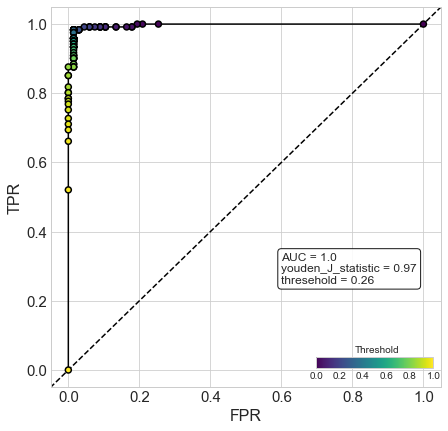

In [13]:
plot_roc_auc(lr_metrics.fpr, lr_metrics.tpr, lr_metrics.threshold, youden=[0.9685457012458369, 0.26])

## Precision-Recall

In [14]:
from MLLytics.plots import plot_rp

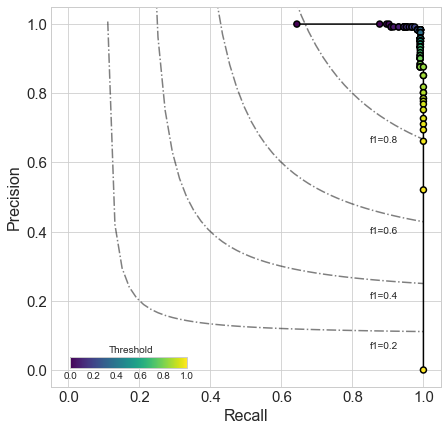

In [15]:
plot_rp(lr_metrics.prec, lr_metrics.recall, lr_metrics.threshold)

### Reliability Curve

In [16]:
from MLLytics.plots import plot_reliability_curve

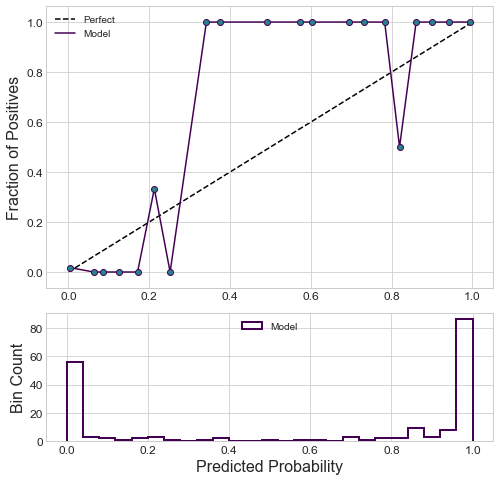

In [17]:
plot_reliability_curve(prob, label)

## Confusion Matrix

In [18]:
from MLLytics.plots import plot_confusion_matrix

Confusion matrix, without normalization
[[ 66   1]
 [  6 115]]


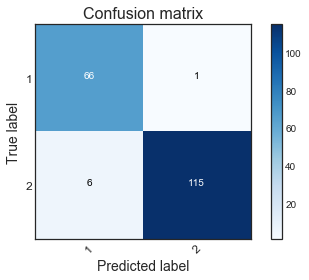

In [19]:
plot_confusion_matrix(prob, label, label_names=['1','2'])

Confusion matrix, without normalization
[[67  0]
 [26 95]]


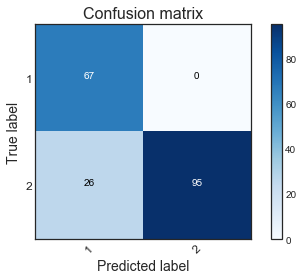

In [20]:
plot_confusion_matrix(prob, label, label_names=['1','2'], threshold=0.9)

## Correlation triangle

In [21]:
from MLLytics.plots import plot_corr_matrix_triangle

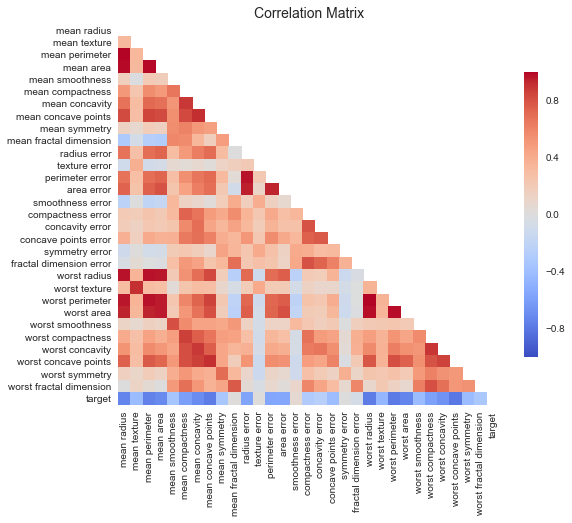

In [22]:
plot_corr_matrix_triangle(df.corr())

In [23]:
from MLLytics.plots import plot_cluster_corr

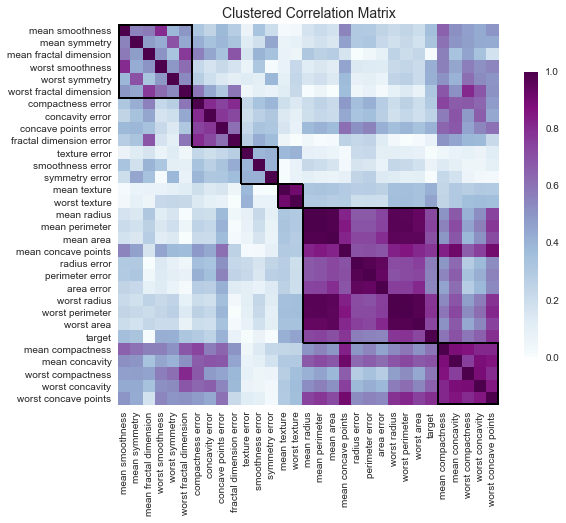

In [24]:
plot_cluster_corr(df.corr())